# Gaussian Process for Event likelihoods

## Preliminary steps

### Loading necessary packages

In [1]:
using Plots
using AugmentedGaussianProcesses
using Distributions

## Creating some random data

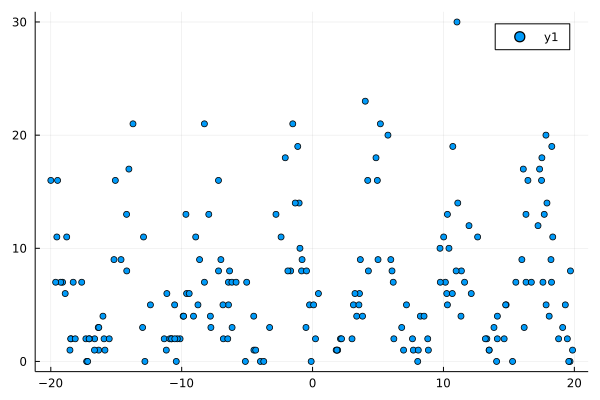

In [2]:
n_data = 200
X = (rand(n_data) .- 0.5) * 40
r = 5.0
Y = rand.(NegativeBinomial.(r, AGP.logistic.(sin.(X))))
scatter(X, Y)

## Run GP model with negative binomial likelihood to learn p

In [3]:
kernel = SqExponentialKernel() ∘ ScaleTransform(1.0)
m_negbinomial = VGP(
    X, Y, kernel, NegBinomialLikelihood(r), AnalyticVI(); optimiser=false, verbose=2
)
@time train!(m_negbinomial, 20)

[ Info: Starting training Variational Gaussian Process with a Negative Binomial Likelihood (r = 5.0) infered by Analytic Variational Inference  with 200 samples, 1 features and 1 latent GP
Training Progress: 100%|████████████████████████████████| Time: 0:00:02
  iter:  20
  ELBO:  -611.3441110495223
[ Info: Training ended after 20 iterations. Total number of iterations 20
  2.835696 seconds (6.81 M allocations: 414.639 MiB, 4.65% gc time, 97.94% compilation time)


(Variational Gaussian Process with a Negative Binomial Likelihood (r = 5.0) infered by Analytic Variational Inference , (local_vars = (c = [0.20656394766559028, 0.411333453111443, 0.18003976444265993, 0.5884583617154264, 0.32963440757131324, 0.2923095839993407, 0.49490130205007243, 0.2340889175505566, 0.1949662306077537, 0.22134754946215157  …  0.17033427985625565, 0.23070532010525918, 0.2437590836335602, 0.4922823664075255, 0.4606761671700127, 0.538760701813513, 0.17674725204882777, 0.442946517780487, 0.36944013083510874, 0.30491638751332173], θ = [2.491148461316845, 10.354416892778987, 2.9919226021282235, 10.207139273544854, 3.468648455796359, 4.96469955491535, 8.330656313114467, 5.972750500381079, 3.4889551973539716, 5.477653557999571  …  4.489151312457, 7.964704551450231, 7.960621636517149, 6.371836500805532, 2.948046656354787, 12.694415257130503, 3.9896192308571163, 4.427839857098791, 3.460727507951226, 5.953941178268899]), opt_state = (NamedTuple(),), hyperopt_state = (NamedTuple

## Running the same model but with a Poisson likelihood

In [4]:
kernel = SqExponentialKernel() ∘ ScaleTransform(1.0)
m_poisson = VGP(
    X, Y, kernel, PoissonLikelihood(r), AnalyticVI(); optimiser=false, verbose=2
)
@time train!(m_poisson, 20)

[ Info: Starting training Variational Gaussian Process with a Poisson Likelihood (λ = 5.0) infered by Analytic Variational Inference  with 200 samples, 1 features and 1 latent GP
Training Progress: 100%|████████████████████████████████| Time: 0:00:01
  iter:  20
  ELBO:  -711.9045406540424
[ Info: Training ended after 20 iterations. Total number of iterations 20
  1.995203 seconds (4.32 M allocations: 301.862 MiB, 6.30% gc time, 96.91% compilation time)


(Variational Gaussian Process with a Poisson Likelihood (λ = 14.819135747502312) infered by Analytic Variational Inference , (local_vars = (c = [0.38973552523312033, 0.3074811664452832, 0.3426058905852287, 0.5646097706574678, 0.5430201940322891, 0.4918117020840629, 0.42960944642345067, 0.4380185029161068, 0.16505330437334845, 0.13700004446273134  …  0.32062480524666154, 0.24536163965457813, 0.24822202019909625, 0.41822728257636727, 0.6877056299215805, 0.4903993509158767, 0.2573468524290768, 0.6631345415566552, 0.6158689239471518, 0.46305634165615694], θ = [4.286356700366424, 11.105712997645785, 4.713035030303467, 10.435407111981185, 5.4817805777124375, 6.877169124303618, 8.820105496222848, 7.807901577396477, 4.851044535307687, 6.747434497034754  …  6.1673399604759425, 9.414808194132364, 9.374452861550104, 6.880749550029011, 5.172804009534519, 13.079827297379884, 5.5430263948817595, 6.584877736456177, 5.5936931798876905, 7.788219826783655], γ = [8.680951505949995, 6.3861485204958655, 8.

Prediction and plot function on a grid
Create a grid and compute prediction on it

In [5]:
function compute_grid(model, n_grid=50)
    mins = -20
    maxs = 20
    x_grid = range(mins, maxs; length=n_grid) # Create a grid
    y_grid, sig_y_grid = proba_y(model, reshape(x_grid, :, 1)) # Predict the mean and variance on the grid
    return y_grid, sig_y_grid, x_grid
end

compute_grid (generic function with 2 methods)

Plot the data as a scatter plot

In [6]:
function plot_data(X, Y)
    return Plots.scatter(X, Y; alpha=0.33, msw=0.0, lab="", size=(800, 500))
end

function plot_model(model, X, Y, title=nothing)
    n_grid = 100
    y_grid, sig_y_grid, x_grid = compute_grid(model, n_grid)
    p = plot_data(X, Y)
    Plots.plot!(
        p,
        x_grid,
        y_grid;
        ribbon=2 * sqrt.(sig_y_grid), # Plot 2 std deviations
        title=title,
        color="red",
        lab="",
        linewidth=3.0,
    )
    return p
end;

## Comparison between the two likelihoods

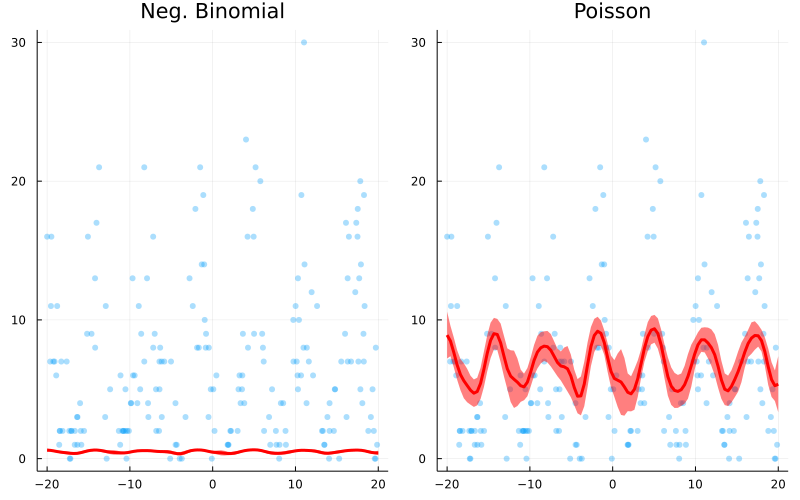

In [7]:
Plots.plot(
    plot_model.(
        [m_negbinomial, m_poisson], Ref(X), Ref(Y), ["Neg. Binomial", "Poisson"]
    )...;
    layout=(1, 2),
)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*